# CIFAR-100数据集

此数据集与 CIFAR-10 类似，不同之处在于它有 100 个类，每个类包含 600 个图像。每个类有 500 个训练图像和 100 个测试图像。CIFAR-100 中的 100 个类分为 20 个超类。每个图像都带有一个“精细”标签（它所属的类）和一个“粗”标签（它所属的超类）。

下载地址：https://www.cs.toronto.edu/~kriz/cifar.html

## 1、数据集读取与可视化

得到img_batch: 保存图片数据的列表

得到label_batch: 保存分类的标签

In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# 100种类别
label_name = ['apple', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
              'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorbike', 'mountain', 
              'mouse', 'mushroom', 'oak', 'orange', 'orchid', 'otter', 'palm', 'pear', 'pickup truck', 'pine', 'plain', 
              'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 
              'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
              'sunflower', 'sweet pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 
              'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm']

In [3]:
# 示例数据集路径
example_path = './dataset/CIFAR-100/train'

In [4]:
# 加载batch
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

pic_dic = unpickle(example_path)

In [5]:
print(pic_dic.keys())
print(pic_dic[b'fine_labels'])
print(len(pic_dic[b'fine_labels']))
print(len(pic_dic[b'data'][0]))
print(len(pic_dic[b'filenames'][0]))
print(pic_dic[b'filenames'][0])

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
[19, 29, 0, 11, 1, 86, 90, 28, 23, 31, 39, 96, 82, 17, 71, 39, 8, 97, 80, 71, 74, 59, 70, 87, 59, 84, 64, 52, 42, 64, 8, 17, 47, 65, 21, 22, 81, 11, 24, 84, 78, 45, 49, 97, 56, 76, 11, 90, 89, 78, 73, 14, 87, 9, 71, 6, 47, 20, 98, 47, 36, 55, 72, 43, 51, 35, 83, 33, 27, 53, 92, 50, 15, 89, 36, 18, 89, 46, 33, 42, 39, 64, 75, 38, 23, 42, 66, 77, 49, 18, 46, 15, 35, 69, 95, 83, 75, 99, 73, 93, 55, 39, 4, 97, 61, 93, 51, 69, 56, 84, 59, 64, 94, 4, 11, 33, 68, 38, 20, 33, 34, 32, 46, 53, 88, 67, 70, 64, 53, 64, 8, 96, 87, 30, 20, 30, 66, 19, 76, 87, 52, 62, 35, 63, 40, 4, 99, 63, 74, 53, 26, 95, 48, 27, 33, 29, 39, 79, 32, 46, 64, 28, 85, 32, 82, 78, 39, 54, 28, 66, 65, 72, 21, 64, 62, 72, 0, 44, 7, 12, 19, 11, 31, 61, 79, 45, 81, 79, 98, 43, 46, 67, 80, 68, 74, 48, 81, 94, 86, 69, 39, 73, 2, 46, 49, 63, 43, 14, 49, 68, 65, 41, 37, 45, 36, 21, 77, 37, 39, 8, 9, 62, 86, 39, 19, 54, 39, 28, 11, 89, 90, 90, 7

展示一个图像，可以看到是一个32*32大小的图像

In [6]:
img_batch = []
for i in range(0,len(pic_dic[b'data'])):
    image = pic_dic[b'data'][i]
    r = image[:1024].reshape(32,32) #红色分量
    g = image[1024:2048].reshape(32,32) #绿色分量
    b = image[2048:3072].reshape(32,32) #蓝色分量
    img = np.zeros((32,32,3))
    img[:,:,0] = r/255
    img[:,:,1] = g/255
    img[:,:,2] = b/255
    img_batch.append(img)
label_batch = pic_dic[b'fine_labels']
print(img_batch[0].shape)

(32, 32, 3)


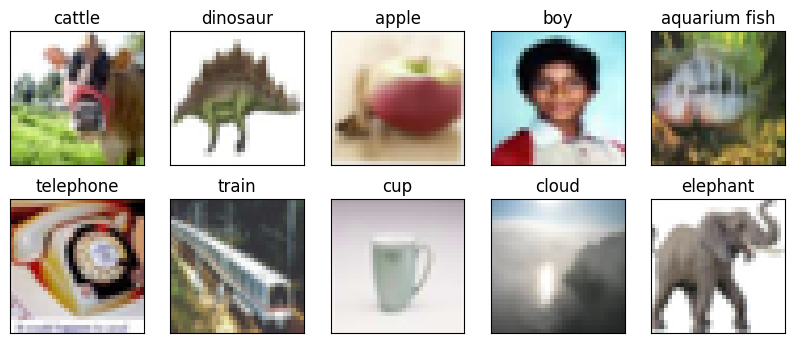

In [7]:
# 可视化前10个图像
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_batch[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label_name[label_batch[i]])
plt.show()

## 2、建立dataset

In [8]:
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy

In [9]:
# 数据集的根地址
root_path = './dataset/CIFAR-100/'

In [10]:
train_img_batch = []
train_label_batch = []
pic_dic = unpickle(root_path + 'train')
for i in range(0,len(pic_dic[b'data'])):
    image = pic_dic[b'data'][i]
    r = image[:1024].reshape(32,32) #红色分量
    g = image[1024:2048].reshape(32,32) #绿色分量
    b = image[2048:3072].reshape(32,32) #蓝色分量
    img = np.zeros((32,32,3))
    img[:,:,0] = r/255
    img[:,:,1] = g/255
    img[:,:,2] = b/255
    train_img_batch.append(img)
train_label_batch = pic_dic[b'fine_labels']
print(len(train_img_batch))
print(len(train_label_batch))

50000
50000


获得测试数据

In [11]:
# 测试集数据
val_path = './dataset/CIFAR-100/test'

In [12]:
val_pic_dic = unpickle(val_path)
val_img_batch = []
for i in range(0,len(val_pic_dic[b'data'])):

    image = val_pic_dic[b'data'][i]

    r = image[:1024].reshape(32,32) #红色分量
    g = image[1024:2048].reshape(32,32) #绿色分量
    b = image[2048:3072].reshape(32,32) #蓝色分量
    img = np.zeros((32,32,3))

    img[:,:,0] = r/255
    img[:,:,1] = g/255
    img[:,:,2] = b/255

    val_img_batch.append(img)
val_label_batch = val_pic_dic[b'fine_labels']
print(val_img_batch[0].shape)

(32, 32, 3)


定义数据集

In [13]:
# 定义数据集
class CRIF_dataset(data.Dataset):
    def __init__(self, 
                image, 
                label):
        self.image = image
        self.label = label
    
    def __getitem__(self,index):
        img = self.image[index]
        label = self.label[index]
        img = numpy.transpose(img, (2, 0, 1))
        
        images = torch.tensor(img,dtype=torch.float32)
        labels = torch.tensor(label,dtype=torch.long)

        return images, labels
    
    def __len__(self):
        return len(self.image)

In [14]:
# train dataset
train_dataset = CRIF_dataset(
    image = train_img_batch,
    label = train_label_batch
)
test_dataset =  CRIF_dataset(
    image = val_img_batch,
    label = val_label_batch
)

In [15]:
# 定义train_loader
train_loader = data.DataLoader(
    train_dataset, 
    batch_size=128, 
    shuffle=True, 
    num_workers=0
)
# 定义test_loader
test_loader = data.DataLoader(
    test_dataset, 
    batch_size=64, 
    shuffle=True, 
    num_workers=0
)

In [16]:
print(len(train_loader))
print(len(test_loader))

391
157


## 3、搭建神经网络

从模型文件种导入模型

In [17]:
import torch
import torch.nn as nn

from nn.LeNet import LeNet_3C
from nn.ResNet import ResNet50
from nn.Vision_Transformer import VIT

In [18]:
choice = 'Flag used to choose model'
while choice not in ['0','1','2']:
    choice = input("Choose model in [LeNet, ResNet, VIT] with input of (0 or 1 or 2)")
choice = int(choice)
choice

1

In [19]:
# 定义模型名称和对应的文件名
model_file_dict = {
    0: 'LeNet',
    1: 'ResNet50',
    2: 'VIT'
}

# 根据choice选择文件名
if choice in model_file_dict:
    file_name = model_file_dict[choice]
else:
    raise ValueError('Invalid choice of model')

In [20]:
# 定义模型名称和对应的类
model_dict = {
    0: LeNet_3C,
    1: ResNet50,
    2: VIT
}

# 根据choice选择模型类
if choice in model_dict:
    model_class = model_dict[choice]
    if choice < 2:
        model = model_class(class_number=100, in_channels=3)
    elif choice == 2:
        model = model_class(
            image_size = 32,
            patch_size = 4,
            num_classes = 100,
            dim = 64,
            depth = 6,
            heads = 16,
            mlp_dim = 128,
            dropout = 0.1,
            emb_dropout = 0.1
            )
else:
    raise ValueError('Invalid choice of model')
print(f'use model {model_class}')

use model <class 'nn.ResNet.ResNet50'>


## 4、训练过程

训练模型，定义损失函数、优化器

设置device

In [21]:
# 设置GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device =  'cpu'
# print(device)

将模型加载到device上

In [22]:
model.to(device)

ResNet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

训练参数

In [23]:
EPOCH = 300
learning_rate = 0.001

损失函数

In [24]:
# 交叉熵损失函数
criterion = nn.CrossEntropyLoss()

优化器

In [25]:
# SGD优化器
#optimizer = torch.optim.SGD(params=model.parameters(),
#                            lr = learning_rate
#)
# Adam优化器
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCH, eta_min=0)

训练过程

In [26]:
import time
from tqdm import tqdm

In [27]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []
standered_acc = 0.0

# 将模型设为训练模式
model.train()

def train():
    for epoch in range(EPOCH):
        running_loss = 0.0
        total = 0
        correct = 0
        start_time = time.time()  # 记录训练开始时间
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, data in progress_bar:
            #取出数据及标签
            inputs,labels = data
            #数据及标签均送入GPU或CPU
            inputs,labels = inputs.to(device),labels.to(device)
            #前向传播
            outputs = model(inputs)
            #计算损失函数
            loss = criterion(outputs,labels)
            running_loss += loss.item()
            #清空上一轮的梯度
            optimizer.zero_grad()
            #反向传播
            loss.backward()
            #参数更新
            optimizer.step()
            # Calculate accuracy
            # 在给定维度上输出张量outputs中的最大值及其对应的索引

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 计算训练速度和时间
            used_time = time.time() - start_time
            it_per_sec = (i + 1) / (used_time +0.001)
            last_time = used_time / (i + 1) * (len(train_loader) - i - 1)

            # 更新进度条
            progress_bar.set_description(
                f"Epoch{epoch+1}, loss: {loss.item():.4f}, Acc: {100 * correct / total :.2f}%, mem: {torch.cuda.max_memory_allocated() / 1024 / 1024 / 1024:.2f} GB"
            )

        # Validation
        model.eval() # Set model to evaluation mode
        val_running_loss = 0.0
        val_total = 0
        val_correct = 0
        start_time = time.time()  # 记录训练开始时间
        progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
        with torch.no_grad(): # Disable gradient computation for efficiency
            for i, val_data in progress_bar: # Use test_loader for validation
                val_inputs, val_labels = val_data
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                loss = criterion(val_outputs, val_labels)
                val_running_loss += loss.item()
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()

                used_time = time.time() - start_time
                it_per_sec = (i + 1) / (used_time + 0.001)
                last_time = used_time / (i + 1) * (len(train_loader) - i - 1)

                progress_bar.set_description(
                f"Epoch{epoch+1}_val, loss: {loss.item():.4f}, Acc: {100 * val_correct / val_total :.2f}%, mem: {torch.cuda.max_memory_allocated() / 1024 / 1024 / 1024:.2f} GB"
            )
        
        
        val_loss.append(val_running_loss / len(test_loader))
        val_acc.append(100 * val_correct / val_total)
        standered_acc = max(val_acc)

        # 保存best.pt 
        if val_acc[-1] == standered_acc:
            torch.save(model.state_dict(), f'./checkpoints/CIFAR-100/{file_name}'+'_best.pt')
            print('saved best model to checkpoints/CIFAR-100')
        model.train() # Set model back to training mode

        train_loss.append(running_loss / len(train_loader))
        train_acc.append(100 * correct / total)

In [28]:
print(len(train_loader))

391


In [29]:
train()

Epoch1, loss: 4.2252, Acc: 3.76%, mem: 0.71 GB: 100%|██████████| 391/391 [00:56<00:00,  6.97it/s]
Epoch1_val, loss: 4.2160, Acc: 6.10%, mem: 0.71 GB: 100%|██████████| 157/157 [00:04<00:00, 33.11it/s]


saved best model to checkpoints/CIFAR-100


Epoch2, loss: 3.9290, Acc: 9.04%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
Epoch2_val, loss: 4.3696, Acc: 10.52%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.99it/s]


saved best model to checkpoints/CIFAR-100


Epoch3, loss: 3.7114, Acc: 13.52%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
Epoch3_val, loss: 4.1081, Acc: 14.01%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 40.72it/s]


saved best model to checkpoints/CIFAR-100


Epoch4, loss: 3.5522, Acc: 17.76%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
Epoch4_val, loss: 3.4004, Acc: 16.88%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.85it/s]


saved best model to checkpoints/CIFAR-100


Epoch5, loss: 3.3239, Acc: 21.37%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
Epoch5_val, loss: 3.5481, Acc: 19.53%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 42.42it/s]


saved best model to checkpoints/CIFAR-100


Epoch6, loss: 3.0551, Acc: 25.65%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
Epoch6_val, loss: 3.3760, Acc: 20.79%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 40.63it/s]


saved best model to checkpoints/CIFAR-100


Epoch7, loss: 3.0714, Acc: 30.18%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
Epoch7_val, loss: 2.8756, Acc: 21.74%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.86it/s]


saved best model to checkpoints/CIFAR-100


Epoch8, loss: 2.7680, Acc: 34.76%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
Epoch8_val, loss: 2.9623, Acc: 22.08%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.03it/s]


saved best model to checkpoints/CIFAR-100


Epoch9, loss: 2.3723, Acc: 39.19%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
Epoch9_val, loss: 3.0697, Acc: 23.51%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.51it/s]


saved best model to checkpoints/CIFAR-100


Epoch10, loss: 2.4116, Acc: 45.09%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
Epoch10_val, loss: 3.9719, Acc: 22.47%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.28it/s]
Epoch11, loss: 2.1703, Acc: 50.37%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
Epoch11_val, loss: 3.8514, Acc: 23.54%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.34it/s]


saved best model to checkpoints/CIFAR-100


Epoch12, loss: 1.7670, Acc: 56.44%, mem: 0.71 GB: 100%|██████████| 391/391 [00:31<00:00, 12.23it/s]
Epoch12_val, loss: 2.5634, Acc: 23.95%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 40.28it/s]


saved best model to checkpoints/CIFAR-100


Epoch13, loss: 1.6307, Acc: 63.53%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s]
Epoch13_val, loss: 4.1522, Acc: 23.94%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 44.83it/s]
Epoch14, loss: 1.0772, Acc: 68.87%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]
Epoch14_val, loss: 3.7463, Acc: 23.29%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.81it/s]
Epoch15, loss: 0.8516, Acc: 73.92%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
Epoch15_val, loss: 4.2832, Acc: 23.55%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 45.06it/s]
Epoch16, loss: 0.7261, Acc: 79.99%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s]
Epoch16_val, loss: 4.5715, Acc: 23.56%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 45.06it/s]
Epoch17, loss: 0.9237, Acc: 82.44%, mem: 0.71 GB: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
Epoch17_val, loss: 3.0162, Acc: 23.51%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch19, loss: 0.8067, Acc: 85.66%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.16it/s]
Epoch19_val, loss: 4.3375, Acc: 24.09%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.07it/s]
Epoch20, loss: 0.4215, Acc: 87.45%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.41it/s]
Epoch20_val, loss: 4.9005, Acc: 23.49%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.75it/s]
Epoch21, loss: 0.4960, Acc: 88.53%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s]
Epoch21_val, loss: 3.2021, Acc: 24.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 42.22it/s]
Epoch22, loss: 0.6620, Acc: 89.23%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.38it/s]
Epoch22_val, loss: 5.9042, Acc: 24.07%, mem: 0.71 GB: 100%|██████████| 157/157 [00:03<00:00, 41.53it/s]
Epoch23, loss: 0.4292, Acc: 89.35%, mem: 0.71 GB: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s]
Epoch23_val, loss: 3.4965, Acc: 23.88%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch26, loss: 0.5482, Acc: 91.14%, mem: 0.71 GB: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s]
Epoch26_val, loss: 4.0527, Acc: 25.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.09it/s]


saved best model to checkpoints/CIFAR-100


Epoch27, loss: 0.3660, Acc: 91.66%, mem: 0.71 GB: 100%|██████████| 391/391 [01:23<00:00,  4.70it/s]
Epoch27_val, loss: 6.5388, Acc: 24.63%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.75it/s]
Epoch28, loss: 0.4452, Acc: 92.22%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
Epoch28_val, loss: 4.8507, Acc: 25.63%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 19.10it/s]


saved best model to checkpoints/CIFAR-100


Epoch29, loss: 0.5223, Acc: 92.22%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.03it/s]
Epoch29_val, loss: 4.8741, Acc: 24.88%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 19.75it/s]
Epoch30, loss: 0.2182, Acc: 92.08%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s]
Epoch30_val, loss: 5.9715, Acc: 24.90%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 21.14it/s]
Epoch31, loss: 0.1837, Acc: 92.72%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  5.00it/s]
Epoch31_val, loss: 4.3662, Acc: 25.43%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 19.67it/s]
Epoch32, loss: 0.3145, Acc: 92.06%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.99it/s]
Epoch32_val, loss: 4.6580, Acc: 24.78%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.44it/s]
Epoch33, loss: 0.2329, Acc: 93.14%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
Epoch33_val, loss: 5.2668, Acc: 25.30%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch36, loss: 0.2826, Acc: 93.56%, mem: 0.71 GB: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
Epoch36_val, loss: 5.6734, Acc: 24.56%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.44it/s]
Epoch37, loss: 0.3148, Acc: 93.97%, mem: 0.71 GB: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
Epoch37_val, loss: 4.7400, Acc: 25.48%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.53it/s]
Epoch38, loss: 0.3542, Acc: 93.87%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
Epoch38_val, loss: 5.1438, Acc: 25.91%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.60it/s]


saved best model to checkpoints/CIFAR-100


Epoch39, loss: 0.2105, Acc: 93.94%, mem: 0.71 GB: 100%|██████████| 391/391 [01:16<00:00,  5.09it/s]
Epoch39_val, loss: 5.8402, Acc: 25.45%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.60it/s]
Epoch40, loss: 0.2104, Acc: 93.90%, mem: 0.71 GB: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s]
Epoch40_val, loss: 5.5195, Acc: 25.75%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.37it/s]
Epoch41, loss: 0.1162, Acc: 94.66%, mem: 0.71 GB: 100%|██████████| 391/391 [01:16<00:00,  5.08it/s]
Epoch41_val, loss: 5.6321, Acc: 26.24%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.79it/s]


saved best model to checkpoints/CIFAR-100


Epoch42, loss: 0.1496, Acc: 95.00%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.05it/s]
Epoch42_val, loss: 4.5322, Acc: 25.04%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.78it/s]
Epoch43, loss: 0.2405, Acc: 94.30%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
Epoch43_val, loss: 7.1380, Acc: 26.07%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.99it/s]
Epoch44, loss: 0.2334, Acc: 94.52%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.05it/s]
Epoch44_val, loss: 4.8569, Acc: 25.99%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.32it/s]
Epoch45, loss: 0.2881, Acc: 94.29%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
Epoch45_val, loss: 6.1778, Acc: 26.60%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.21it/s]


saved best model to checkpoints/CIFAR-100


Epoch46, loss: 0.1154, Acc: 94.59%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s]
Epoch46_val, loss: 4.5918, Acc: 26.37%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.05it/s]
Epoch47, loss: 0.1860, Acc: 95.42%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.05it/s]
Epoch47_val, loss: 8.1021, Acc: 26.54%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.82it/s]
Epoch48, loss: 0.1768, Acc: 95.50%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.08it/s]
Epoch48_val, loss: 4.4111, Acc: 26.49%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.29it/s]
Epoch49, loss: 0.2160, Acc: 94.49%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]
Epoch49_val, loss: 5.8181, Acc: 26.04%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 19.39it/s]
Epoch50, loss: 0.2251, Acc: 95.20%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]
Epoch50_val, loss: 3.6848, Acc: 26.15%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch52, loss: 0.1510, Acc: 95.29%, mem: 0.71 GB: 100%|██████████| 391/391 [01:23<00:00,  4.68it/s]
Epoch52_val, loss: 3.9196, Acc: 26.60%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.13it/s]
Epoch53, loss: 0.1765, Acc: 95.36%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.52it/s]
Epoch53_val, loss: 5.4865, Acc: 27.18%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.13it/s]


saved best model to checkpoints/CIFAR-100


Epoch54, loss: 0.2818, Acc: 95.36%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.53it/s]
Epoch54_val, loss: 7.7215, Acc: 26.55%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.00it/s]
Epoch55, loss: 0.4901, Acc: 95.33%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.55it/s]
Epoch55_val, loss: 6.9441, Acc: 27.02%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.17it/s]
Epoch56, loss: 0.1868, Acc: 95.64%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.57it/s]
Epoch56_val, loss: 7.1019, Acc: 27.31%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.15it/s]


saved best model to checkpoints/CIFAR-100


Epoch57, loss: 0.1504, Acc: 95.84%, mem: 0.71 GB: 100%|██████████| 391/391 [01:27<00:00,  4.49it/s]
Epoch57_val, loss: 4.4596, Acc: 26.44%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.09it/s]
Epoch58, loss: 0.2147, Acc: 95.71%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.54it/s]
Epoch58_val, loss: 7.4811, Acc: 27.66%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.11it/s]


saved best model to checkpoints/CIFAR-100


Epoch59, loss: 0.3894, Acc: 96.12%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.52it/s]
Epoch59_val, loss: 6.5527, Acc: 27.06%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.33it/s]
Epoch60, loss: 0.3606, Acc: 95.89%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
Epoch60_val, loss: 5.5363, Acc: 26.93%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.60it/s]
Epoch61, loss: 0.2258, Acc: 95.72%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.53it/s]
Epoch61_val, loss: 7.4529, Acc: 27.83%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.69it/s]


saved best model to checkpoints/CIFAR-100


Epoch62, loss: 0.3578, Acc: 96.53%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.53it/s]
Epoch62_val, loss: 7.9099, Acc: 27.72%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 19.15it/s]
Epoch63, loss: 0.1923, Acc: 95.99%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.53it/s]
Epoch63_val, loss: 5.4259, Acc: 27.54%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.93it/s]
Epoch64, loss: 0.2914, Acc: 96.56%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.55it/s]
Epoch64_val, loss: 7.7078, Acc: 27.90%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.97it/s]


saved best model to checkpoints/CIFAR-100


Epoch65, loss: 0.1709, Acc: 96.01%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.52it/s]
Epoch65_val, loss: 5.6565, Acc: 27.85%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.88it/s]
Epoch66, loss: 0.2249, Acc: 96.16%, mem: 0.71 GB: 100%|██████████| 391/391 [01:21<00:00,  4.82it/s]
Epoch66_val, loss: 8.3566, Acc: 27.97%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.69it/s]


saved best model to checkpoints/CIFAR-100


Epoch67, loss: 0.3193, Acc: 96.41%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.01it/s]
Epoch67_val, loss: 9.2807, Acc: 27.44%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.38it/s]
Epoch68, loss: 0.1261, Acc: 96.74%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s]
Epoch68_val, loss: 4.3504, Acc: 28.42%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.70it/s]


saved best model to checkpoints/CIFAR-100


Epoch69, loss: 0.1277, Acc: 96.36%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  5.00it/s]
Epoch69_val, loss: 4.5033, Acc: 28.24%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.31it/s]
Epoch70, loss: 0.1911, Acc: 96.51%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.01it/s]
Epoch70_val, loss: 6.6745, Acc: 27.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.37it/s]
Epoch71, loss: 0.1354, Acc: 96.48%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  5.00it/s]
Epoch71_val, loss: 7.5521, Acc: 27.73%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.28it/s]
Epoch72, loss: 0.0779, Acc: 96.60%, mem: 0.71 GB: 100%|██████████| 391/391 [01:21<00:00,  4.81it/s]
Epoch72_val, loss: 5.2375, Acc: 27.52%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.64it/s]
Epoch73, loss: 0.2047, Acc: 96.56%, mem: 0.71 GB: 100%|██████████| 391/391 [01:27<00:00,  4.47it/s]
Epoch73_val, loss: 6.5924, Acc: 28.13%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch75, loss: 0.2090, Acc: 96.57%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.55it/s]
Epoch75_val, loss: 6.0115, Acc: 28.59%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.44it/s]
Epoch76, loss: 0.2076, Acc: 96.79%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.54it/s]
Epoch76_val, loss: 5.4830, Acc: 28.04%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.13it/s]
Epoch77, loss: 0.1285, Acc: 96.97%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.52it/s]
Epoch77_val, loss: 8.2353, Acc: 27.92%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 15.70it/s]
Epoch78, loss: 0.1459, Acc: 96.86%, mem: 0.71 GB: 100%|██████████| 391/391 [01:24<00:00,  4.63it/s]
Epoch78_val, loss: 7.9142, Acc: 28.23%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.16it/s]
Epoch79, loss: 0.0823, Acc: 97.02%, mem: 0.71 GB: 100%|██████████| 391/391 [01:24<00:00,  4.65it/s]
Epoch79_val, loss: 4.8429, Acc: 28.72%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch81, loss: 0.0885, Acc: 97.31%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
Epoch81_val, loss: 5.0998, Acc: 28.68%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.68it/s]
Epoch82, loss: 0.1567, Acc: 96.76%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.54it/s]
Epoch82_val, loss: 6.0996, Acc: 28.34%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.47it/s]
Epoch83, loss: 0.1995, Acc: 96.77%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.57it/s]
Epoch83_val, loss: 4.6628, Acc: 28.45%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 15.96it/s]
Epoch84, loss: 0.1061, Acc: 96.91%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.52it/s]
Epoch84_val, loss: 7.4535, Acc: 28.35%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.06it/s]
Epoch85, loss: 0.0854, Acc: 97.37%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.55it/s]
Epoch85_val, loss: 5.6309, Acc: 28.99%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch88, loss: 0.1799, Acc: 97.53%, mem: 0.71 GB: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
Epoch88_val, loss: 7.6221, Acc: 28.35%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 20.09it/s]
Epoch89, loss: 0.1471, Acc: 96.95%, mem: 0.71 GB: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
Epoch89_val, loss: 7.4096, Acc: 27.94%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 20.42it/s]
Epoch90, loss: 0.2316, Acc: 96.89%, mem: 0.71 GB: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
Epoch90_val, loss: 6.4489, Acc: 28.27%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.39it/s]
Epoch91, loss: 0.3596, Acc: 97.26%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.56it/s]
Epoch91_val, loss: 2.9438, Acc: 28.68%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.62it/s]
Epoch92, loss: 0.0462, Acc: 97.42%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
Epoch92_val, loss: 5.9566, Acc: 29.00%, mem: 0.71 GB: 100%|██████████| 157/157 [00:0

saved best model to checkpoints/CIFAR-100


Epoch96, loss: 0.0607, Acc: 97.62%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.60it/s]
Epoch96_val, loss: 5.6128, Acc: 28.14%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.89it/s]
Epoch97, loss: 0.0119, Acc: 97.35%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.51it/s]
Epoch97_val, loss: 7.7230, Acc: 28.25%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.56it/s]
Epoch98, loss: 0.0929, Acc: 97.35%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.57it/s]
Epoch98_val, loss: 7.7900, Acc: 28.48%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.35it/s]
Epoch99, loss: 0.1789, Acc: 97.44%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.57it/s]
Epoch99_val, loss: 6.9401, Acc: 29.14%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.27it/s]
Epoch100, loss: 0.1293, Acc: 97.43%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.60it/s]
Epoch100_val, loss: 5.8408, Acc: 29.66%, mem: 0.71 GB: 100%|██████████| 157/157 [00

saved best model to checkpoints/CIFAR-100


Epoch101, loss: 0.2004, Acc: 97.47%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.55it/s]
Epoch101_val, loss: 6.9025, Acc: 28.57%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.29it/s]
Epoch102, loss: 0.1186, Acc: 97.71%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.58it/s]
Epoch102_val, loss: 3.9896, Acc: 28.69%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 16.43it/s]
Epoch103, loss: 0.0435, Acc: 97.79%, mem: 0.71 GB: 100%|██████████| 391/391 [01:25<00:00,  4.56it/s]
Epoch103_val, loss: 6.6795, Acc: 28.70%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 15.92it/s]
Epoch104, loss: 0.3143, Acc: 97.42%, mem: 0.71 GB: 100%|██████████| 391/391 [01:26<00:00,  4.54it/s]
Epoch104_val, loss: 4.0837, Acc: 29.18%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.54it/s]
Epoch105, loss: 0.0410, Acc: 97.36%, mem: 0.71 GB: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
Epoch105_val, loss: 6.8554, Acc: 29.28%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch112, loss: 0.0154, Acc: 97.93%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s]
Epoch112_val, loss: 3.8602, Acc: 29.34%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 20.49it/s]
Epoch113, loss: 0.1795, Acc: 97.55%, mem: 0.71 GB: 100%|██████████| 391/391 [01:20<00:00,  4.87it/s]
Epoch113_val, loss: 8.3036, Acc: 29.17%, mem: 0.71 GB: 100%|██████████| 157/157 [00:07<00:00, 21.15it/s]
Epoch114, loss: 0.0510, Acc: 97.97%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s]
Epoch114_val, loss: 6.2653, Acc: 29.40%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 18.86it/s]
Epoch115, loss: 0.0739, Acc: 98.14%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.99it/s]
Epoch115_val, loss: 5.0838, Acc: 29.41%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.53it/s]
Epoch116, loss: 0.0630, Acc: 97.89%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  5.00it/s]
Epoch116_val, loss: 6.5033, Acc: 29.84%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch117, loss: 0.0708, Acc: 97.70%, mem: 0.71 GB: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
Epoch117_val, loss: 7.2640, Acc: 28.82%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.43it/s]
Epoch118, loss: 0.3020, Acc: 97.71%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.97it/s]
Epoch118_val, loss: 5.6953, Acc: 28.94%, mem: 0.71 GB: 100%|██████████| 157/157 [00:09<00:00, 17.22it/s]
Epoch119, loss: 0.0946, Acc: 97.85%, mem: 0.71 GB: 100%|██████████| 391/391 [01:18<00:00,  4.98it/s]
Epoch119_val, loss: 5.8853, Acc: 29.66%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.84it/s]
Epoch120, loss: 0.1090, Acc: 98.20%, mem: 0.71 GB: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s]
Epoch120_val, loss: 7.4758, Acc: 30.26%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 17.66it/s]


saved best model to checkpoints/CIFAR-100


Epoch121, loss: 0.0225, Acc: 98.05%, mem: 0.71 GB: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
Epoch121_val, loss: 6.5964, Acc: 29.72%, mem: 0.71 GB: 100%|██████████| 157/157 [00:08<00:00, 19.14it/s]
Epoch122, loss: 0.1244, Acc: 98.29%, mem: 0.71 GB: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s]
Epoch122_val, loss: 8.6728, Acc: 29.51%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.87it/s]
Epoch123, loss: 0.0112, Acc: 97.88%, mem: 0.71 GB: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]
Epoch123_val, loss: 5.1400, Acc: 29.57%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.77it/s]
Epoch124, loss: 0.1164, Acc: 97.56%, mem: 0.71 GB: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]
Epoch124_val, loss: 9.7347, Acc: 29.02%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 30.53it/s]
Epoch125, loss: 0.0911, Acc: 98.11%, mem: 0.71 GB: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]
Epoch125_val, loss: 9.3498, Acc: 29.36%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch132, loss: 0.0331, Acc: 97.74%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.60it/s]
Epoch132_val, loss: 6.1810, Acc: 30.27%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.67it/s]
Epoch133, loss: 0.2067, Acc: 98.14%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]
Epoch133_val, loss: 5.1068, Acc: 29.97%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.05it/s]
Epoch134, loss: 0.1312, Acc: 98.17%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]
Epoch134_val, loss: 7.2355, Acc: 29.77%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.16it/s]
Epoch135, loss: 0.0753, Acc: 98.33%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s]
Epoch135_val, loss: 7.9624, Acc: 30.61%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.47it/s]


saved best model to checkpoints/CIFAR-100


Epoch136, loss: 0.0953, Acc: 98.08%, mem: 0.71 GB: 100%|██████████| 391/391 [00:49<00:00,  7.82it/s]
Epoch136_val, loss: 4.6941, Acc: 29.11%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.59it/s]
Epoch137, loss: 0.1320, Acc: 98.01%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch137_val, loss: 9.3998, Acc: 29.02%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.11it/s]
Epoch138, loss: 0.1089, Acc: 98.11%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]
Epoch138_val, loss: 7.0481, Acc: 29.72%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.03it/s]
Epoch139, loss: 0.1996, Acc: 98.02%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch139_val, loss: 6.8018, Acc: 29.72%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.11it/s]
Epoch140, loss: 0.0923, Acc: 98.54%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch140_val, loss: 7.3187, Acc: 30.50%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch154, loss: 0.0677, Acc: 98.49%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s]
Epoch154_val, loss: 5.3211, Acc: 29.81%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.72it/s]
Epoch155, loss: 0.0265, Acc: 98.27%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.71it/s]
Epoch155_val, loss: 7.5885, Acc: 30.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.99it/s]
Epoch156, loss: 0.0728, Acc: 98.13%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.82it/s]
Epoch156_val, loss: 6.3568, Acc: 30.42%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.39it/s]
Epoch157, loss: 0.0466, Acc: 98.48%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.80it/s]
Epoch157_val, loss: 3.7819, Acc: 30.28%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.83it/s]
Epoch158, loss: 0.1778, Acc: 98.62%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch158_val, loss: 6.3187, Acc: 29.95%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch166, loss: 0.1680, Acc: 98.55%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch166_val, loss: 4.4017, Acc: 30.39%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.51it/s]
Epoch167, loss: 0.2018, Acc: 98.36%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch167_val, loss: 6.3565, Acc: 30.24%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.19it/s]
Epoch168, loss: 0.0519, Acc: 98.60%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.72it/s]
Epoch168_val, loss: 4.3227, Acc: 30.42%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.43it/s]
Epoch169, loss: 0.1240, Acc: 98.60%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s]
Epoch169_val, loss: 6.1847, Acc: 30.05%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.27it/s]
Epoch170, loss: 0.1065, Acc: 98.36%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.69it/s]
Epoch170_val, loss: 4.2318, Acc: 29.94%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch173, loss: 0.1159, Acc: 98.66%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.67it/s]
Epoch173_val, loss: 8.5835, Acc: 29.99%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.24it/s]
Epoch174, loss: 0.0497, Acc: 98.39%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch174_val, loss: 5.6806, Acc: 31.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.45it/s]


saved best model to checkpoints/CIFAR-100


Epoch175, loss: 0.1325, Acc: 98.67%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.61it/s]
Epoch175_val, loss: 7.7250, Acc: 30.74%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.25it/s]
Epoch176, loss: 0.0099, Acc: 98.97%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]
Epoch176_val, loss: 7.2661, Acc: 30.87%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.57it/s]
Epoch177, loss: 0.1698, Acc: 98.58%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch177_val, loss: 5.2454, Acc: 30.79%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.69it/s]
Epoch178, loss: 0.1334, Acc: 98.12%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch178_val, loss: 6.2062, Acc: 30.23%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.26it/s]
Epoch179, loss: 0.0315, Acc: 98.40%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch179_val, loss: 5.6164, Acc: 30.95%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch185, loss: 0.1084, Acc: 98.16%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.71it/s]
Epoch185_val, loss: 6.2088, Acc: 30.46%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.04it/s]
Epoch186, loss: 0.0310, Acc: 98.42%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.74it/s]
Epoch186_val, loss: 8.2471, Acc: 31.01%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.21it/s]
Epoch187, loss: 0.0489, Acc: 98.89%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch187_val, loss: 4.9883, Acc: 31.80%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.31it/s]


saved best model to checkpoints/CIFAR-100


Epoch188, loss: 0.0577, Acc: 99.21%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.66it/s]
Epoch188_val, loss: 9.0355, Acc: 31.58%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.67it/s]
Epoch189, loss: 0.0215, Acc: 98.65%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.72it/s]
Epoch189_val, loss: 8.3292, Acc: 30.51%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.40it/s]
Epoch190, loss: 0.0414, Acc: 98.20%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.71it/s]
Epoch190_val, loss: 4.6322, Acc: 30.86%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.52it/s]
Epoch191, loss: 0.0965, Acc: 98.62%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]
Epoch191_val, loss: 5.3113, Acc: 31.21%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 30.04it/s]
Epoch192, loss: 0.0660, Acc: 98.88%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]
Epoch192_val, loss: 7.2322, Acc: 30.61%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch200, loss: 0.0342, Acc: 99.00%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.72it/s]
Epoch200_val, loss: 4.7296, Acc: 31.69%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.60it/s]
Epoch201, loss: 0.0287, Acc: 98.92%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.66it/s]
Epoch201_val, loss: 5.0565, Acc: 31.44%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.44it/s]
Epoch202, loss: 0.0201, Acc: 98.38%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.63it/s]
Epoch202_val, loss: 7.2431, Acc: 30.95%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.06it/s]
Epoch203, loss: 0.1391, Acc: 98.35%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]
Epoch203_val, loss: 6.5844, Acc: 30.68%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.17it/s]
Epoch204, loss: 0.0187, Acc: 98.71%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]
Epoch204_val, loss: 5.4026, Acc: 30.91%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch206, loss: 0.1188, Acc: 99.04%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch206_val, loss: 4.7632, Acc: 30.79%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.04it/s]
Epoch207, loss: 0.0462, Acc: 98.65%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s]
Epoch207_val, loss: 3.9590, Acc: 31.23%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.57it/s]
Epoch208, loss: 0.0336, Acc: 99.02%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch208_val, loss: 8.6048, Acc: 31.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.20it/s]
Epoch209, loss: 0.0286, Acc: 98.94%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]
Epoch209_val, loss: 7.5710, Acc: 31.20%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.37it/s]
Epoch210, loss: 0.0705, Acc: 98.87%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s]
Epoch210_val, loss: 6.7290, Acc: 31.15%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch227, loss: 0.0153, Acc: 98.98%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.57it/s]
Epoch227_val, loss: 8.7042, Acc: 31.56%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.74it/s]
Epoch228, loss: 0.1931, Acc: 98.89%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s]
Epoch228_val, loss: 7.6527, Acc: 31.82%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.53it/s]
Epoch229, loss: 0.0311, Acc: 98.55%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]
Epoch229_val, loss: 5.9526, Acc: 30.95%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.56it/s]
Epoch230, loss: 0.0074, Acc: 98.73%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]
Epoch230_val, loss: 7.6695, Acc: 31.73%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.24it/s]
Epoch231, loss: 0.0023, Acc: 99.07%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.67it/s]
Epoch231_val, loss: 5.6840, Acc: 32.72%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch232, loss: 0.0179, Acc: 99.29%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch232_val, loss: 6.6137, Acc: 31.91%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.80it/s]
Epoch233, loss: 0.0465, Acc: 99.09%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch233_val, loss: 5.2566, Acc: 31.58%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.36it/s]
Epoch234, loss: 0.0229, Acc: 98.70%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.82it/s]
Epoch234_val, loss: 7.0005, Acc: 31.48%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.14it/s]
Epoch235, loss: 0.1637, Acc: 98.71%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch235_val, loss: 5.6822, Acc: 32.12%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.55it/s]
Epoch236, loss: 0.0355, Acc: 98.99%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s]
Epoch236_val, loss: 5.3095, Acc: 32.53%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch275, loss: 0.0882, Acc: 99.17%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.69it/s]
Epoch275_val, loss: 6.9691, Acc: 31.84%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.92it/s]
Epoch276, loss: 0.1289, Acc: 98.88%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.71it/s]
Epoch276_val, loss: 7.6688, Acc: 31.47%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.28it/s]
Epoch277, loss: 0.0272, Acc: 98.92%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch277_val, loss: 7.9554, Acc: 32.02%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.28it/s]
Epoch278, loss: 0.0277, Acc: 99.23%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.71it/s]
Epoch278_val, loss: 5.9026, Acc: 32.68%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 28.68it/s]
Epoch279, loss: 0.0058, Acc: 99.23%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]
Epoch279_val, loss: 7.5970, Acc: 32.16%, mem: 0.71 GB: 100%|██████████| 157

saved best model to checkpoints/CIFAR-100


Epoch288, loss: 0.0101, Acc: 99.28%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.58it/s]
Epoch288_val, loss: 6.4917, Acc: 32.71%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 30.16it/s]
Epoch289, loss: 0.0200, Acc: 99.09%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.69it/s]
Epoch289_val, loss: 6.8312, Acc: 32.90%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.60it/s]


saved best model to checkpoints/CIFAR-100


Epoch290, loss: 0.0617, Acc: 99.18%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.62it/s]
Epoch290_val, loss: 6.1272, Acc: 32.48%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.48it/s]
Epoch291, loss: 0.0229, Acc: 99.01%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch291_val, loss: 5.0513, Acc: 32.42%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.98it/s]
Epoch292, loss: 0.0323, Acc: 99.13%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]
Epoch292_val, loss: 5.4655, Acc: 33.02%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.07it/s]


saved best model to checkpoints/CIFAR-100


Epoch293, loss: 0.0476, Acc: 99.19%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch293_val, loss: 8.7853, Acc: 32.38%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.21it/s]
Epoch294, loss: 0.0980, Acc: 99.06%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s]
Epoch294_val, loss: 4.2466, Acc: 32.25%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.64it/s]
Epoch295, loss: 0.0250, Acc: 99.25%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]
Epoch295_val, loss: 5.5034, Acc: 33.65%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.04it/s]


saved best model to checkpoints/CIFAR-100


Epoch296, loss: 0.0117, Acc: 99.23%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.72it/s]
Epoch296_val, loss: 9.2887, Acc: 32.95%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.29it/s]
Epoch297, loss: 0.0103, Acc: 99.31%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.79it/s]
Epoch297_val, loss: 7.0184, Acc: 32.86%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 26.79it/s]
Epoch298, loss: 0.0593, Acc: 99.21%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]
Epoch298_val, loss: 7.4082, Acc: 32.43%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 29.67it/s]
Epoch299, loss: 0.0701, Acc: 99.12%, mem: 0.71 GB: 100%|██████████| 391/391 [00:51<00:00,  7.64it/s]
Epoch299_val, loss: 4.3917, Acc: 32.59%, mem: 0.71 GB: 100%|██████████| 157/157 [00:05<00:00, 27.19it/s]
Epoch300, loss: 0.0292, Acc: 99.20%, mem: 0.71 GB: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s]
Epoch300_val, loss: 3.8110, Acc: 32.86%, mem: 0.71 GB: 100%|██████████| 157

## 5、保存模型

将训练结果保存到 `./checkpoints/CIFAR-100/*.pt`

In [30]:
# 保存模型参数
torch.save(model.state_dict(), f'./checkpoints/CIFAR-100/{file_name}' + '_last.pt')

## 6、测试模型

加载保存好的模型，并在测试集上测试准确率、损失、以及保存测试结果

加载模型

In [31]:
import collections

In [32]:
if choice < 2: 
    net = model_class(class_number=100, in_channels=3)
elif choice == 2:
    net = model_class(
            image_size = 32,
            patch_size = 4,
            num_classes = 100,
            dim = 64,
            depth = 6,
            heads = 16,
            mlp_dim = 128,
            dropout = 0.1,
            emb_dropout = 0.1)
else:
    net = model_class(
        img_size=32, patch_size=2, in_chans=3, num_classes=100,
        embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
        window_size=4, mlp_ratio=4., drop_rate=0., drop_path_rate=0.1,
        norm_layer=nn.LayerNorm, ape=False, patch_norm=True,
        use_checkpoint=False
    )
net.load_state_dict(torch.load(f'./checkpoints/CIFAR-100/{file_name}'+'_best.pt'))

net.to(device)

ResNet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

测试模型

In [33]:
# 将模型设置为评估模式
net.eval()

# 用模型对测试集进行推断
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 输出模型在测试集上的准确率
print('Accuracy of the model on the test images: {:.2f}'.format(100 * correct / total))

Accuracy of the model on the test images: 33.65


## 7、可视化结果及其他

In [34]:
x = np.arange(1,EPOCH+1).astype(dtype=str)
x

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

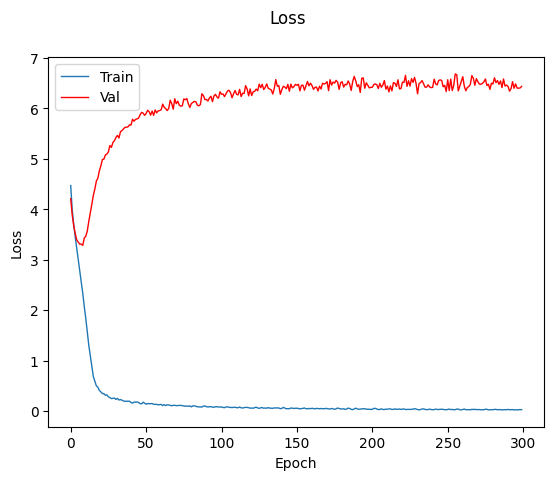

In [36]:
plt.plot(train_loss, label='Train', linewidth=1)
plt.plot(val_loss, label='Val', color='red', linewidth=1)
#plt.xticks(np.arange(0, 301, 19))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.suptitle("Loss")
plt.savefig("./results/CIFAR-100/{}/Loss.png".format(file_name))
plt.show()

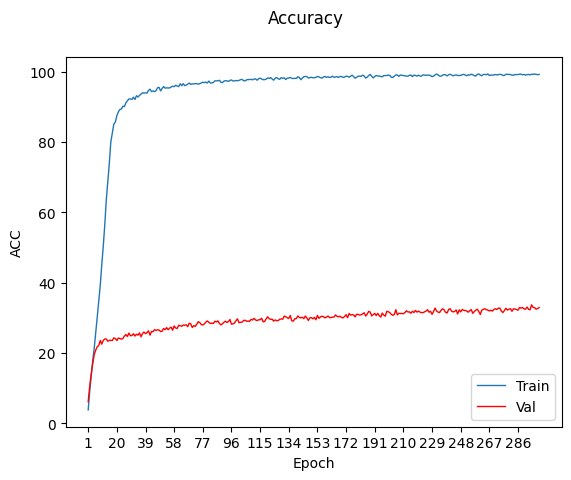

In [37]:
plt.plot(x,train_acc, label='Train', linewidth=1)
plt.plot(x,val_acc, label = 'Val' , color='red', linewidth=1)
plt.xticks(np.arange(0, 301, 19))
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.legend()
plt.suptitle('Accuracy')
plt.savefig('./results/CIFAR-100/{}/ACC.png'.format(file_name))
plt.show()

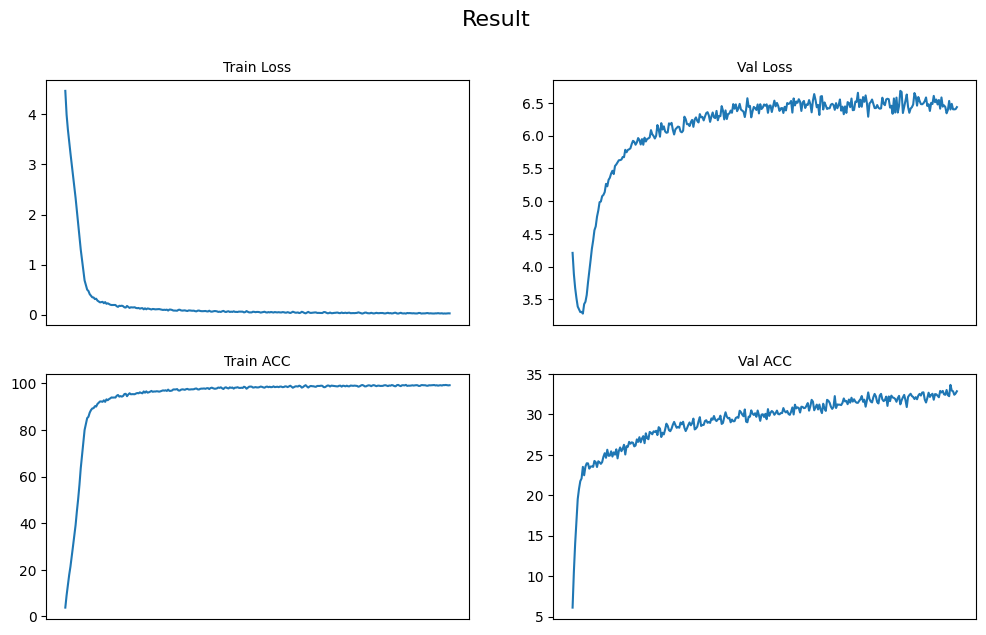

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

ax1 = axes.flat[0]
ax1.plot(train_loss)
ax1.set_title('Train Loss',fontsize=10)
ax1.set_xticks([])

ax2 = axes.flat[1]
ax2.plot(val_loss)
ax2.set_title('Val Loss', fontsize=10)
ax2.set_xticks([])

ax3 = axes.flat[2]
ax3.plot(train_acc)
ax3.set_title('Train ACC', fontsize=10)
ax3.set_xticks([])

ax4 = axes.flat[3]
ax4.plot(val_acc)
ax4.set_title('Val ACC', fontsize=10)
ax4.set_xticks([])

plt.suptitle("Result", fontsize=16)
plt.savefig('./results/CIFAR-100/{}/Result.png'.format(file_name))
plt.show()

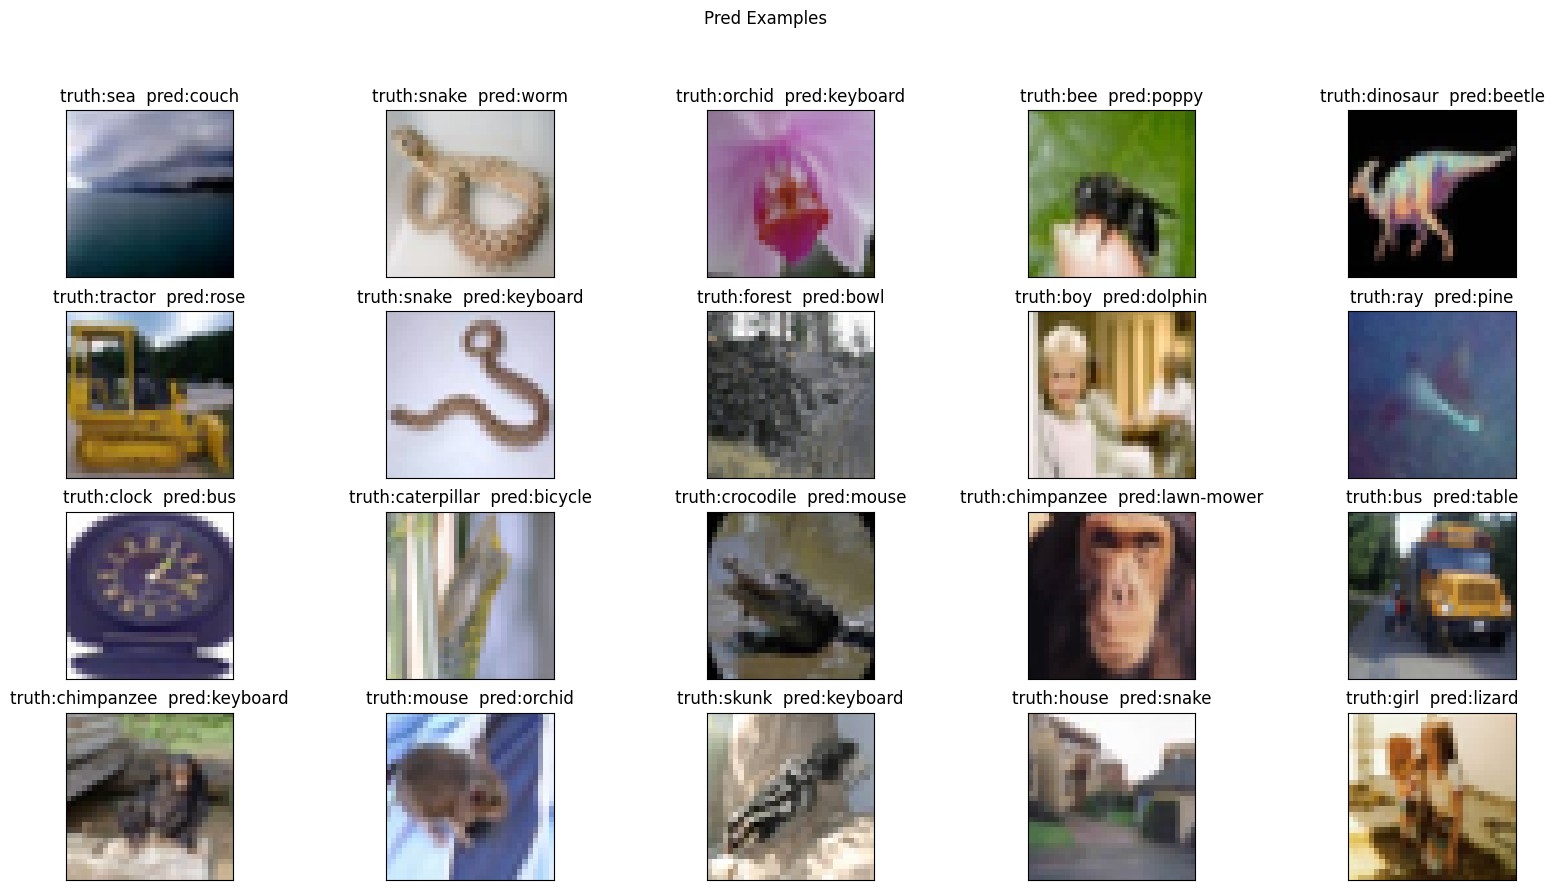

In [39]:
pred_labels = []
for img in val_img_batch[80:100]:

    img = torch.tensor(img, dtype=torch.float32).to('cuda')
    img = img.reshape(1,3,32,32)

    pred = net(img)
    pred_label = torch.argmax(pred).item()
    pred_labels.append(pred_label)

# 可视化图形并保存结果
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(val_img_batch[i+80])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('truth:{}  pred:{}'.format(label_name[val_label_batch[i+80]], label_name[pred_labels[i]]))
plt.suptitle('Pred Examples')
plt.savefig('./results/CIFAR-100/{}/pred.png'.format(file_name))
plt.show()